In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("./spaceship-titanic/train.csv")

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [42]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [43]:
def split_cabin(x):
    if len(str(x).split("/"))<3:
        return ["Missing","Missing","Missing"]
    else:
        return str(x).split("/")


In [44]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [45]:
#Create a preprocessing func to transform dataset
def preprocessing(df):
    #Fill missing in homeplanet
    df["HomePlanet"].fillna("Missing",inplace=True)
    #Cryosleep highly correlated
    df["CryoSleep"].fillna("Missing",inplace=True)
    #Cabin preprocessing (deck and side)
    df["TempCabin"] = df["Cabin"].apply(lambda x:split_cabin(x))
    df["Deck"] = df["TempCabin"].apply(lambda x:x[0])
    df["Side"] =df["TempCabin"].apply(lambda x:x[2])
    df.drop(["TempCabin","Cabin"],axis=1,inplace=True)
    #Destination
    df["Destination"].fillna("Missing",inplace=True)
    #Age
    df["Age"].fillna(df["Age"].mean(),inplace=True)

    #VIP-dropna
    df["VIP"].fillna("Missing",inplace=True)
    #Monetary spending columns
    df["RoomService"].fillna(0,inplace=True)
    df["FoodCourt"].fillna(0,inplace=True)
    df["ShoppingMall"].fillna(0,inplace=True)
    df["Spa"].fillna(0,inplace=True)
    df["VRDeck"].fillna(0,inplace=True)
    #Name drop it due to high cardinality
    df.drop("Name",axis=1,inplace=True)
    #Drop remaining rows
    #df.dropna(inplace=True)


In [46]:
abt = df.copy()

In [47]:
abt.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [48]:
preprocessing(abt)


In [49]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Modeling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
X = abt.drop(["Transported","PassengerId"],axis=1)
X = pd.get_dummies(X)
y = abt["Transported"]

In [52]:
#Create training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<Axes: xlabel='Transported', ylabel='count'>

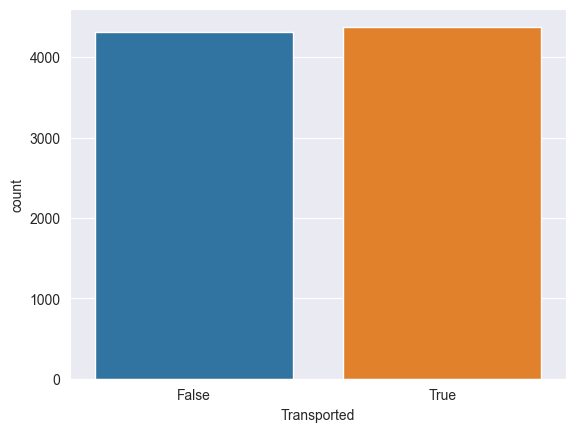

In [53]:
sns.countplot(x="Transported",data=abt)

In [54]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
pipelines = {
    "rf": make_pipeline(StandardScaler(), RandomForestClassifier(random_state=101)),
    "gb": make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=101)),
}


In [56]:
pipelines

{'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=101))]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=101))])}

In [57]:
grid = {
    "rf": {
        "randomforestclassifier__n_estimators": [50, 100]

    },
    "gb": {
        "gradientboostingclassifier__n_estimators": [50, 100],
        "gradientboostingclassifier__learning_rate": [0.1, 0.5],
        "gradientboostingclassifier__max_depth": [5, 7],
        "gradientboostingclassifier__min_samples_split": [5, 10],
        "gradientboostingclassifier__min_samples_leaf": [2, 4],
        "gradientboostingclassifier__subsample": [0.8, 1.0]
    }
}


In [58]:
fit_models = {}
for algo,pipeline in pipelines.items():
    print(f"Training {algo}")
    model = GridSearchCV(pipeline,grid[algo],n_jobs=-1,cv=10)
    model.fit(X_train,y_train)
    fit_models[algo]=model


Training rf
Training gb


In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
fit_models

{'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier(random_state=101))]),
              n_jobs=-1,
              param_grid={'randomforestclassifier__n_estimators': [50, 100]}),
 'gb': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('gradientboostingclassifier',
                                         GradientBoostingClassifier(random_state=101))]),
              n_jobs=-1,
              param_grid={'gradientboostingclassifier__learning_rate': [0.1,
                                                                        0.5],
                          'gradientboostingclassifier__max_depth': [5, 7],
                          'gradientboostingclassifier__min_samples_leaf': [2, 4],
                          'gradient

In [60]:
for algo,pipeline in fit_models.items():
    y_hat = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_hat)
    precision = precision_score(y_test,y_hat)
    recall = recall_score(y_test,y_hat)
    print(f"Metrics for {algo}:accuracy-{accuracy} recall-{recall} precision-{precision}")

Metrics for rf:accuracy-0.8109662576687117 recall-0.8296409472880061 precision-0.8008849557522124
Metrics for gb:accuracy-0.8109662576687117 recall-0.8296409472880061 precision-0.8008849557522124


In [61]:
import pickle

In [62]:
with open("gradientboosting.pkl","wb") as f:
    pickle.dump(fit_models["gb"],f)

In [63]:

#with open("gradientboosting.pkl", "rb") as f:
#    loaded_model = pickle.load(f)


Predict

In [64]:
test_df = pd.read_csv("./spaceship-titanic/test.csv")
abt_test = test_df.copy()
preprocessing(abt_test)
abt_test = pd.get_dummies(abt_test.drop("PassengerId",axis=1))

In [65]:
abt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   float64
 1   RoomService                4277 non-null   float64
 2   FoodCourt                  4277 non-null   float64
 3   ShoppingMall               4277 non-null   float64
 4   Spa                        4277 non-null   float64
 5   VRDeck                     4277 non-null   float64
 6   HomePlanet_Earth           4277 non-null   bool   
 7   HomePlanet_Europa          4277 non-null   bool   
 8   HomePlanet_Mars            4277 non-null   bool   
 9   HomePlanet_Missing         4277 non-null   bool   
 10  CryoSleep_False            4277 non-null   bool   
 11  CryoSleep_True             4277 non-null   bool   
 12  CryoSleep_Missing          4277 non-null   bool   
 13  Destination_55 Cancri e    4277 non-null   bool 

In [66]:
y_hat_test = fit_models["gb"].predict(abt_test)

In [67]:
submission = pd.DataFrame([test_df["PassengerId"],y_hat_test])
submission = submission.T
submission.columns = ['PassengerId',"Transported"]

In [68]:
submission.to_csv('kaggle_submission.csv', index=False, header=True)

Public Score: 0.79682
